In [2]:
#Import lib
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import networkx as nx
import holoviews as hv
import networkx as nx
from holoviews.element.graphs import layout_nodes

In [3]:
uni = pd.read_csv('top 100 world university 2024 new.csv')
uni.head()

,sequence,rank,university,overall_score,academic_reputation,employer_reputation,faculty_student_ratio,citations_per_faculty,international_faculty_ratio,international_students_ratio,international_research_network,employment_outcomes,sustainability,Fundos (US$)
0,0,1,Massachusetts Institute of Technology (MIT),100.0,100.0,100.0,100.0,100.0,100.0,88.2,94.3,100.0,95.2,9.2
1,1,2,University of Cambridge,99.2,100.0,100.0,100.0,92.3,100.0,95.8,99.9,100.0,97.3,7.8
2,2,3,University of Oxford,98.9,100.0,100.0,100.0,90.6,98.2,98.2,100.0,100.0,97.8,6.7
3,3,4,Harvard University,98.3,100.0,100.0,98.3,100.0,84.6,66.8,100.0,100.0,96.7,6.3
4,4,5,Stanford University,98.1,100.0,100.0,100.0,99.9,99.9,51.2,95.8,100.0,94.4,6.2


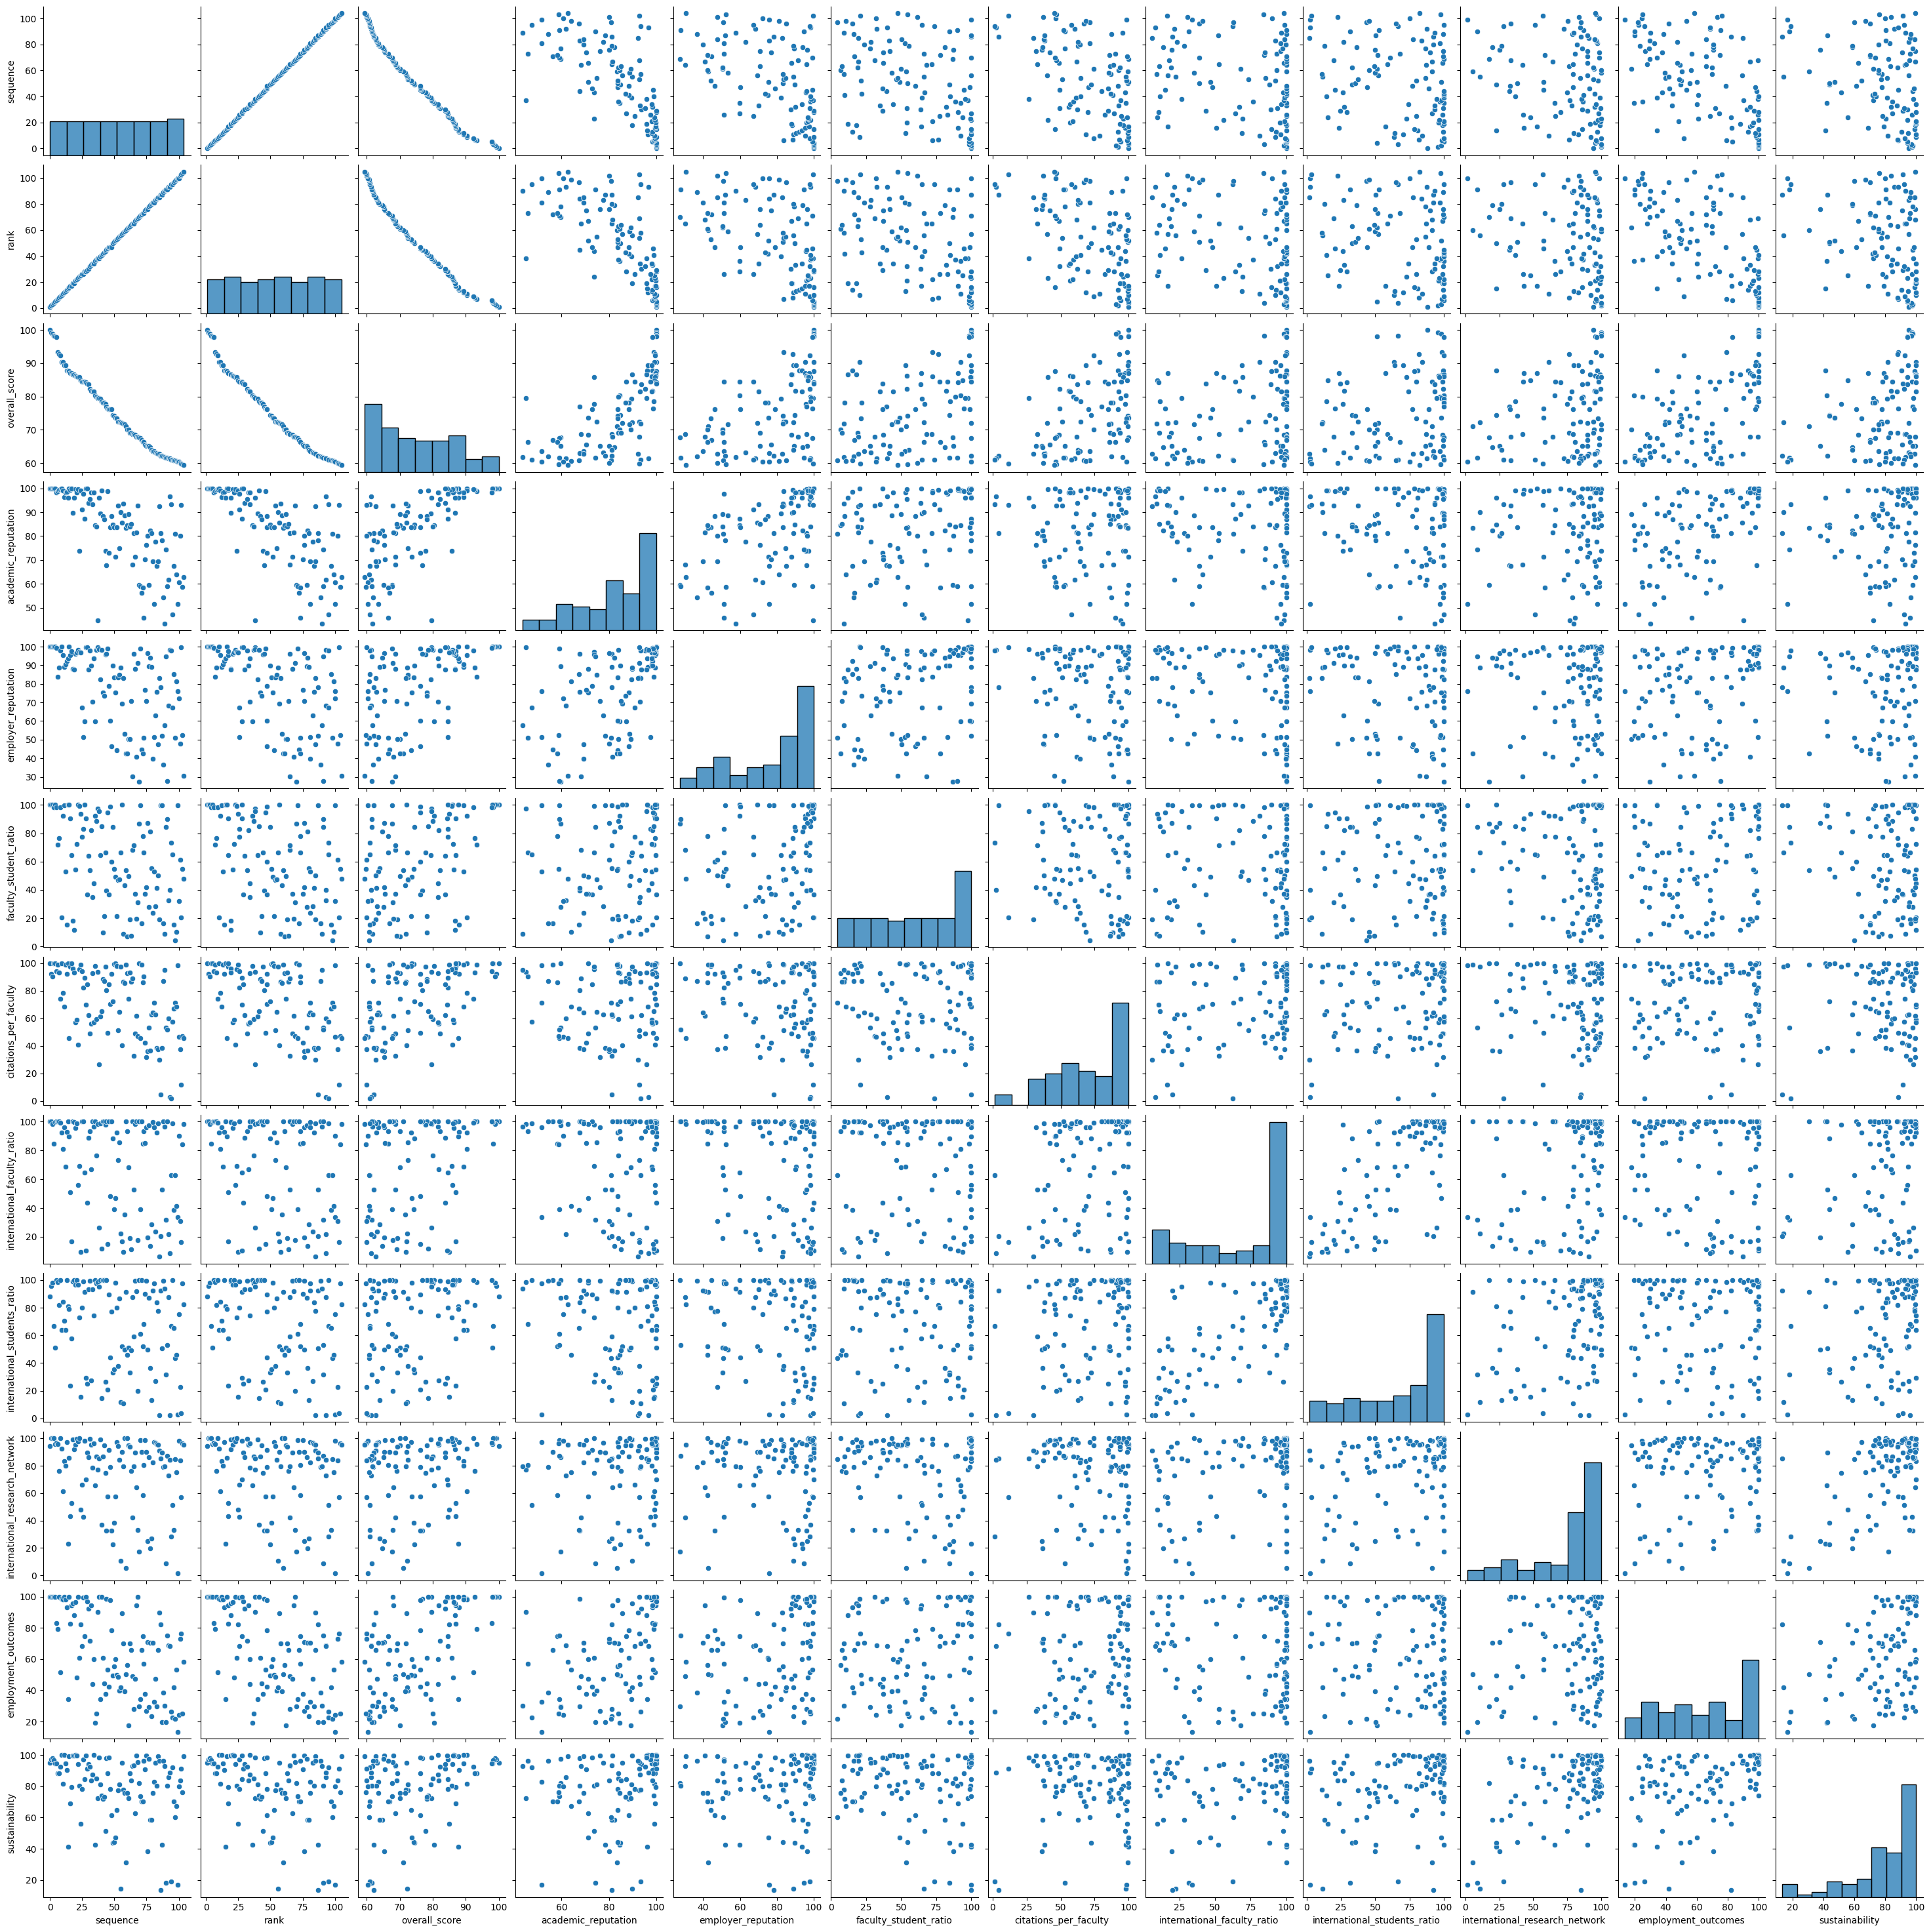

In [4]:
#Show possible charts to do
sns.pairplot(uni)
plt.show()

In [5]:
university = uni['university']
over_score = uni['overall_score']

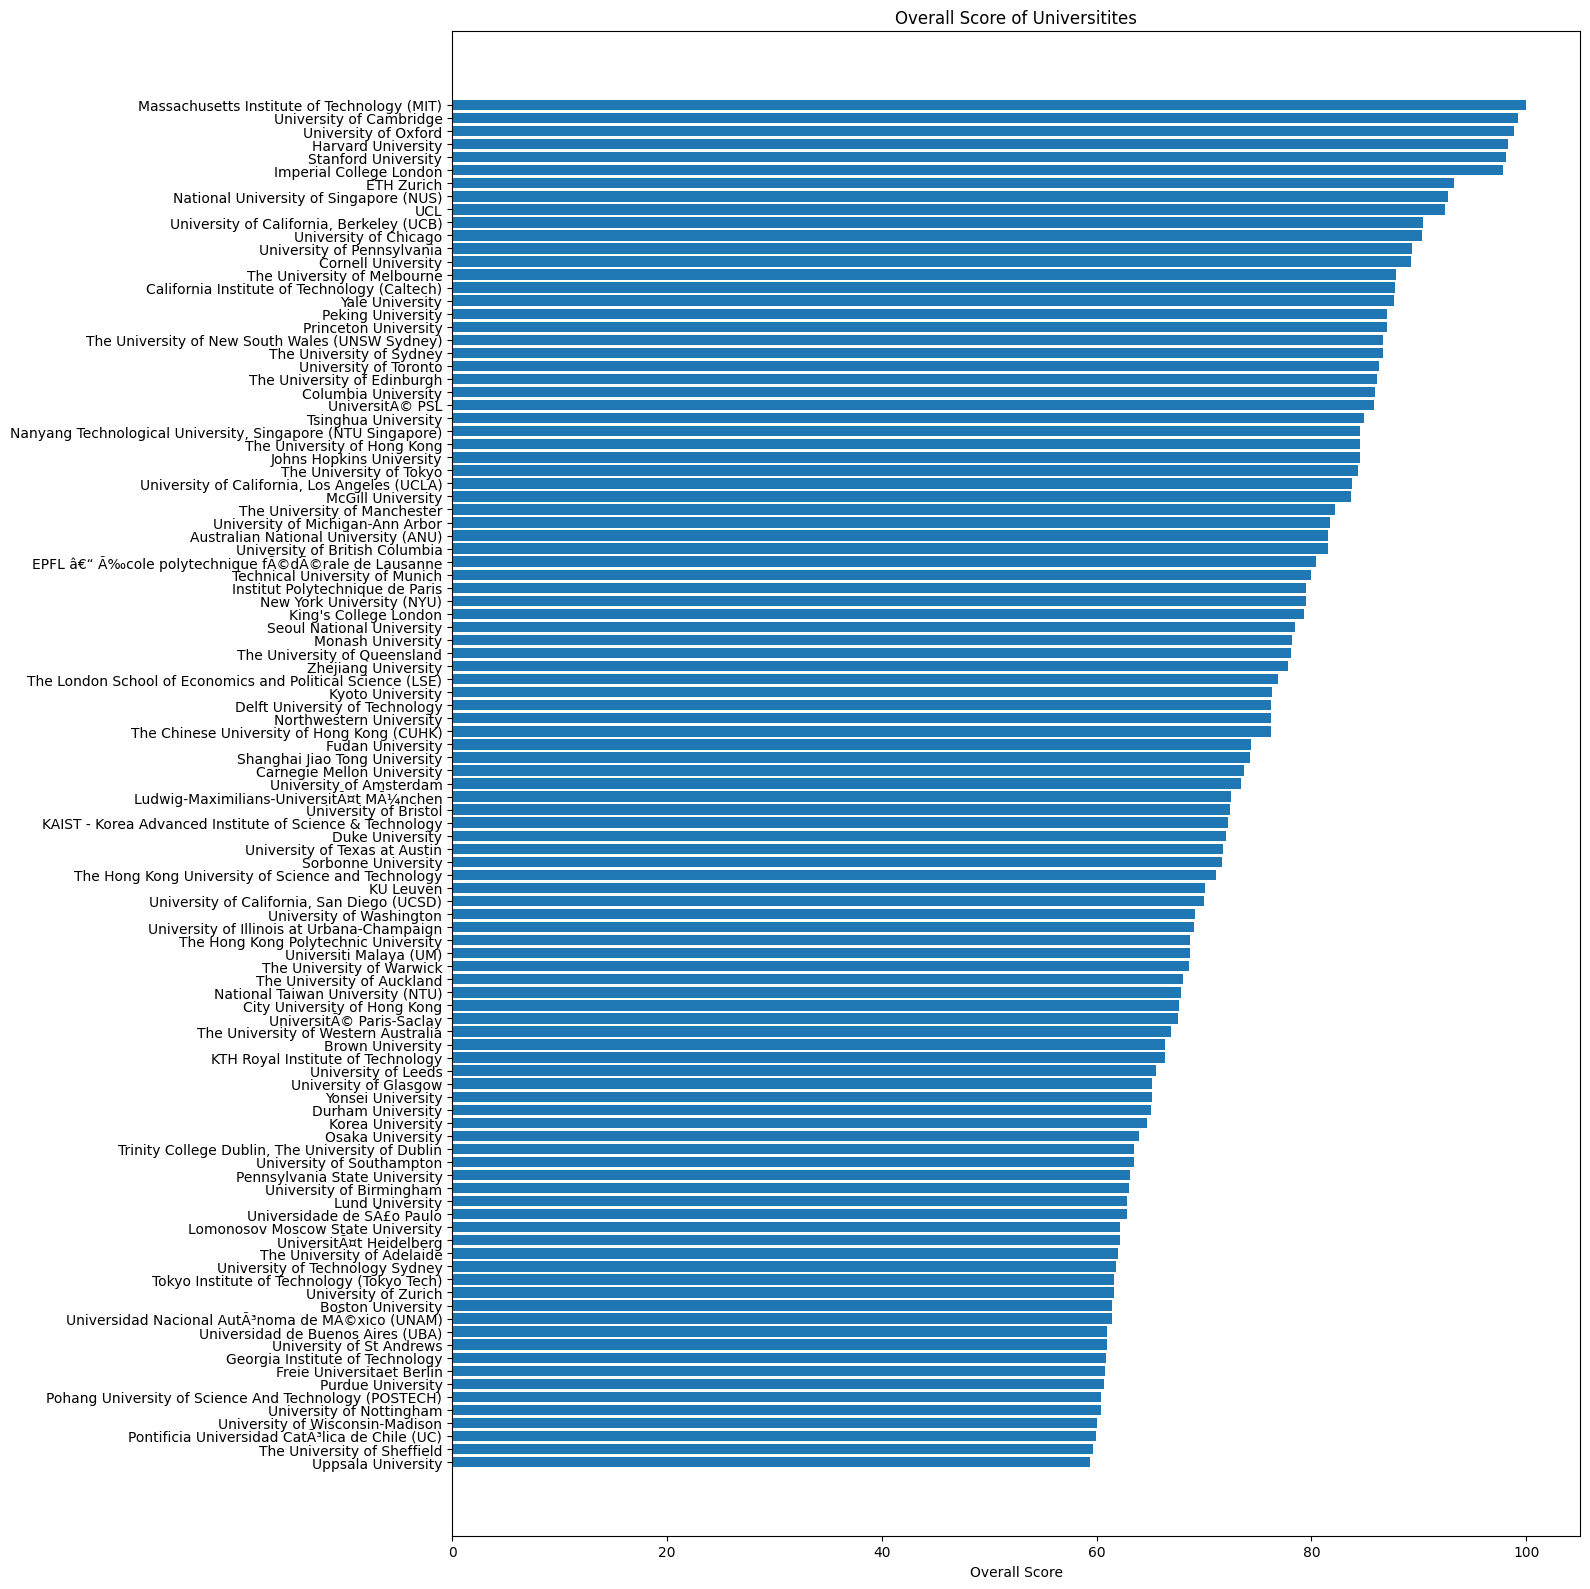

In [6]:
plt.figure(figsize=(16,16))
plt.barh(university,over_score)
plt.xlabel('Overall Score')
plt.title('Overall Score of Universitites')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [7]:
corr_uni = uni[['academic_reputation', 'employer_reputation', 'faculty_student_ratio',
                     'citations_per_faculty', 'international_faculty_ratio', 'international_students_ratio',
                     'international_research_network', 'employment_outcomes', 'sustainability']]


In [8]:
uni_corr = corr_uni.corr()

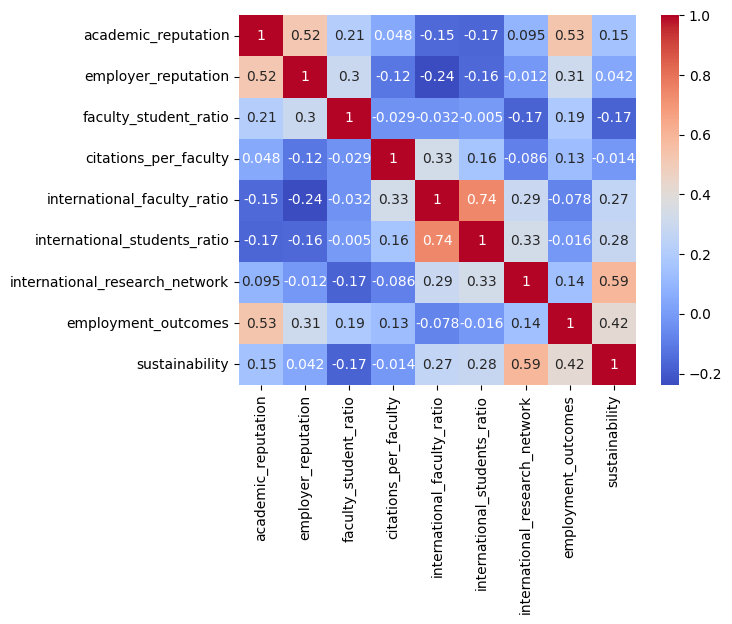

In [9]:
sns.heatmap(uni_corr, annot=True, cmap='coolwarm')
plt.show()

In [10]:
fig = px.scatter(uni, x='sustainability', y='academic_reputation', hover_name='university', 
                 color='sustainability', title='University Sustainability vs Academic Reputation')

fig.update_layout(
    xaxis_title='Sustainability',
    yaxis_title='Academic Reputation',
    width=800,
    height=600,
)

In [11]:
fig = px.funnel(uni, x='rank', y='university',
                title='Best Universitites Plot', labels={'university': 'University'})

#Button are specifing the range 
buttons = [
    dict(label='Top 10', method='update', args=[{'x': [uni.iloc[:10]['rank']], 'y': [uni.iloc[:10]['university']]}]),
    dict(label='Top 20', method='update', args=[{'x': [uni.iloc[10:20]['rank']], 'y': [uni.iloc[10:20]['university']]}]),
    dict(label='Top 30', method='update', args=[{'x': [uni.iloc[20:30]['rank']], 'y': [uni.iloc[20:30]['university']]}]),
    dict(label='Top 40', method='update', args=[{'x': [uni.iloc[30:40]['rank']], 'y': [uni.iloc[30:40]['university']]}]),
    dict(label='Top 50', method='update', args=[{'x': [uni.iloc[40:50]['rank']], 'y': [uni.iloc[40:50]['university']]}]),
    dict(label='Top 60', method='update', args=[{'x': [uni.iloc[50:60]['rank']], 'y': [uni.iloc[50:60]['university']]}]),
    dict(label='Top 70', method='update', args=[{'x': [uni.iloc[60:70]['rank']], 'y': [uni.iloc[60:70]['university']]}]),
    dict(label='Top 80', method='update', args=[{'x': [uni.iloc[70:80]['rank']], 'y': [uni.iloc[70:80]['university']]}]),
    dict(label='Top 90', method='update', args=[{'x': [uni.iloc[80:90]['rank']], 'y': [uni.iloc[80:90]['university']]}]),
    dict(label='Top 100', method='update', args=[{'x': [uni.iloc[90:100]['rank']], 'y': [uni.iloc[90:100]['university']]}]),
    dict(label='All', method='update', args=[{'x': [uni['rank']], 'y': [uni['university']]}])
]

#Create the menu to show specified ranking of the universities, each button is represneting the range of universities. 
dropdown = go.layout.Updatemenu(
    buttons=buttons,
    direction='down',
    showactive=True,
    x=0.1,
    xanchor='left',
    y=1.15,
    yanchor='top'
)

fig.update_layout(updatemenus=[dropdown])
fig.update_layout(
    plot_bgcolor='white',  
    font=dict(family='Arial', size=12),  
    title_font=dict(size=20),  
    title_x=0.5,  
    xaxis_title='Rank',  
    yaxis_title='University',  
    funnelmode='overlay',  
    hoverlabel=dict(bgcolor='white', font_size=14),  
    margin=dict(l=100, r=100, t=100, b=100),  
)

fig.show()


In [12]:
sustain_score = uni['sustainability']

In [13]:
print("Summary Statistics for Sustainability Scores:")
print(sustain_score.describe())

Summary Statistics for Sustainability Scores:
count    105.000000
mean      78.722857
std       21.728810
min       13.400000
25%       71.800000
50%       83.700000
75%       95.100000
max      100.000000
Name: sustainability, dtype: float64


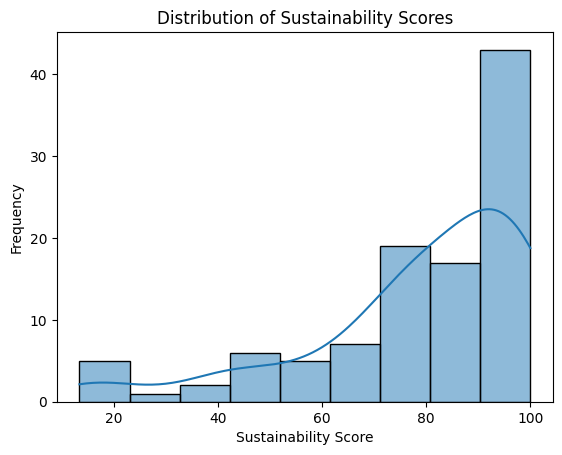

In [14]:
sns.histplot(sustain_score, kde=True)
plt.title('Distribution of Sustainability Scores')
plt.xlabel('Sustainability Score')
plt.ylabel('Frequency')
plt.show()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
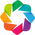

:Graph   [start,end]

In [15]:
#Import Bokeh backend
hv.extension('bokeh')

#Create a graph
G = nx.Graph()

#Add nodes (universities) with their sustainability scores as node attributes
for index, row in uni.iterrows():
    G.add_node(row['university'], sustainability_score=row.get('sustainability'))  #Set default value if attribute is missing

#Add edges (connections) between universities with similar sustainability scores
for u, v in nx.non_edges(G):
    if 'sustainability_score' in G.nodes[u] and 'sustainability_score' in G.nodes[v]:
        score_u = G.nodes[u]['sustainability_score']
        score_v = G.nodes[v]['sustainability_score']
        if abs(score_u - score_v) < 0.5:  #Define a threshold for similarity
            G.add_edge(u, v)

G_layout = nx.spring_layout(G, seed=42)

#Convert positions to a dictionary with node names as keys
node_positions = {node: (pos[0], pos[1]) for node, pos in G_layout.items()}

#Convert to HoloViews Graph and render
g_plot = hv.Graph.from_networkx(G, node_positions).opts(tools=['hover'])

g_plot
